#Введение в информационный поиск
## Домашнее задание 2
### Андрей Кашин, CS

Sources: https://github.com/IIoTeP9HuY/Information_Retrieval_Class

In [1]:
%pylab inline
import pandas as pd
import pylab as pl

pd.set_option('display.max_colwidth', 100)

Populating the interactive namespace from numpy and matplotlib


In [2]:
stats_path = "build/stats/"

In [3]:
def read_clusters_sizes(filepath):
    return map(lambda s: map(int, s.split()), open(filepath, "r").readlines())

def plot_clusters_sizes_distribution(clusters_sizes):
    fig = figure(figsize=(10, 8))
    ax = fig.add_subplot(1, 1, 1)
    pl.title("Cluster size distribution", fontsize=20)
    ax.set_xlabel('Size', fontsize=20)
    ax.set_ylabel('Frequency', fontsize=20)
    ax.set_yscale('log')
    ax.tick_params(axis='both', which='major', labelsize=12)
    h = ax.hist(clusters_sizes["size"], bins=50)
    
def analyze_clusters_sizes(bitsDistance):
    clusters_sizes = read_clusters_sizes(stats_path + "clusters_" + str(bitsDistance) + "_sizes")
    clusters_sizes = pd.DataFrame(clusters_sizes, columns=["id", "size"])
    plot_clusters_sizes_distribution(clusters_sizes)

In [4]:
import random

def shuffled(x):
    x_shuffled = x[:]
    random.shuffle(x_shuffled)
    return x_shuffled

def read_clusters(filepath):
    clusters = []
    current_cluster = []
    with open(filepath, "r") as f:
        for line in f.readlines():
            if line.startswith("Cluster number:"):
                if current_cluster:
                    clusters.append(current_cluster[:])
                current_cluster = []
            else:
                current_cluster.append(line.strip())
    if current_cluster:
        clusters.append(current_cluster[:])
    return clusters

def print_top_k(clusters, k):
    for i, cluster in enumerate(clusters[:k]):
        print("Cluster #{}, size: {}\nSamples:".format(i, len(cluster)))
        for j in range(5):
            print("\t{}".format(shuffled(cluster)[j]))
        print

In [5]:
def analyze_clusters(bitsDistance):
    clusters = read_clusters(stats_path + "clusters_" + str(bitsDistance))
    print_top_k(clusters, 10)
    analyze_clusters_sizes(bitsDistance)

Cluster #0, size: 258
Samples:
	http://simple.wikipedia.org/wiki/.tm
	http://simple.wikipedia.org/wiki/.gl
	http://simple.wikipedia.org/wiki/.fm
	http://simple.wikipedia.org/wiki/.um
	http://simple.wikipedia.org/wiki/.sl

Cluster #1, size: 75
Samples:
	http://simple.wikipedia.org/wiki/Chivres-Val
	http://simple.wikipedia.org/wiki/Audigny
	http://simple.wikipedia.org/wiki/Concevreux
	http://simple.wikipedia.org/wiki/Coulonges-Cohan
	http://simple.wikipedia.org/wiki/Chaourse

Cluster #2, size: 70
Samples:
	http://simple.wikipedia.org/wiki/Shamrock_Summit
	http://simple.wikipedia.org/wiki/Samson,_Alabama
	http://simple.wikipedia.org/wiki/Rockefeller_family
	http://simple.wikipedia.org/wiki/Temple_of_Hera_at_Olympia
	http://simple.wikipedia.org/wiki/Anti-semitism

Cluster #3, size: 69
Samples:
	http://simple.wikipedia.org/wiki/HIV/AIDS
	http://simple.wikipedia.org/wiki/F%C3%A4rgelanda
	http://simple.wikipedia.org/wiki/HIV/AIDS
	http://simple.wikipedia.org/wiki/Cnut_the_Great
	http://simple

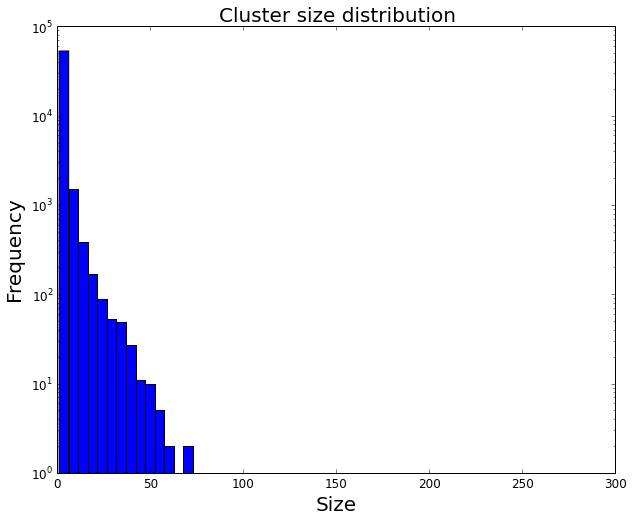

In [6]:
analyze_clusters(5)

Cluster #0, size: 258
Samples:
	http://simple.wikipedia.org/wiki/.uk
	http://simple.wikipedia.org/wiki/.sl
	http://simple.wikipedia.org/wiki/.ru
	http://simple.wikipedia.org/wiki/.sr
	http://simple.wikipedia.org/wiki/.pr

Cluster #1, size: 122
Samples:
	http://simple.wikipedia.org/wiki/Doogal
	http://simple.wikipedia.org/wiki/Delhi_Sultanate
	http://simple.wikipedia.org/wiki/Rise_Against
	http://simple.wikipedia.org/wiki/Pope_Stephen_VIII
	http://simple.wikipedia.org/wiki/Protection_(album)

Cluster #2, size: 108
Samples:
	http://simple.wikipedia.org/wiki/Accent
	http://simple.wikipedia.org/wiki/Danizy
	http://simple.wikipedia.org/wiki/Cessi%C3%A8res
	http://simple.wikipedia.org/wiki/Bois-l%C3%A8s-Pargny
	http://simple.wikipedia.org/wiki/Clacy-et-Thierret

Cluster #3, size: 98
Samples:
	http://simple.wikipedia.org/wiki/Onley,_Virginia
	http://simple.wikipedia.org/wiki/Bridgewater,_Virginia
	http://simple.wikipedia.org/wiki/Front_Royal,_Virginia
	http://simple.wikipedia.org/wiki/Age_of_

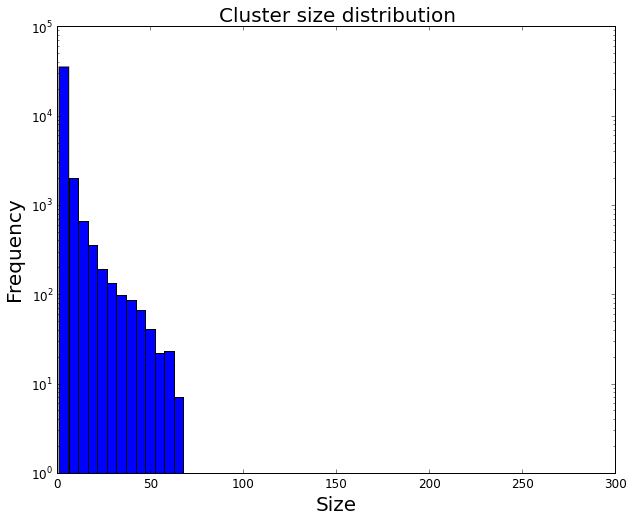

In [7]:
analyze_clusters(10)

Cluster #0, size: 277
Samples:
	http://simple.wikipedia.org/wiki/.pf
	http://simple.wikipedia.org/wiki/.ug
	http://simple.wikipedia.org/wiki/.mn
	http://simple.wikipedia.org/wiki/.ng
	http://simple.wikipedia.org/wiki/.ec

Cluster #1, size: 128
Samples:
	http://simple.wikipedia.org/wiki/Pope_Agapetus_I
	http://simple.wikipedia.org/wiki/Pope_Sisinnius
	http://simple.wikipedia.org/wiki/Pope_Paschal_II
	http://simple.wikipedia.org/wiki/Pope_Victor_II
	http://simple.wikipedia.org/wiki/Hepatocellular_carcinoma

Cluster #2, size: 104
Samples:
	http://simple.wikipedia.org/wiki/Iron_Gate,_Virginia
	http://simple.wikipedia.org/wiki/1185
	http://simple.wikipedia.org/wiki/Saxis,_Virginia
	http://simple.wikipedia.org/wiki/Warrenton,_VA
	http://simple.wikipedia.org/wiki/Luray,_Virginia

Cluster #3, size: 92
Samples:
	http://simple.wikipedia.org/wiki/DeLand,_Florida
	http://simple.wikipedia.org/wiki/Weeki_Wachee,_Florida
	http://simple.wikipedia.org/wiki/Brooksville,_Florida
	http://simple.wikipedia.

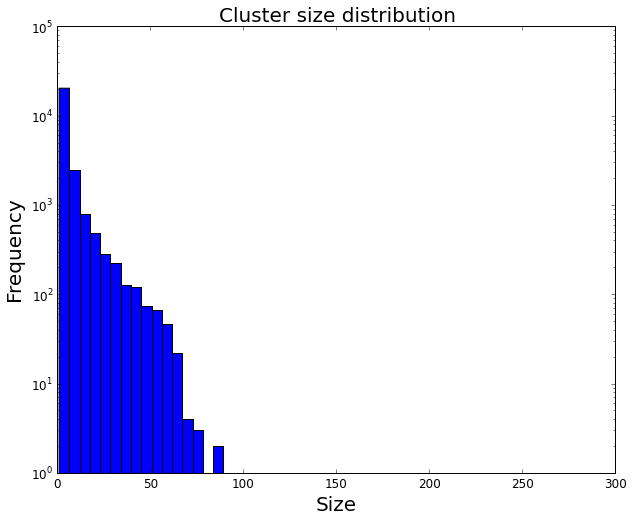

In [8]:
analyze_clusters(15)

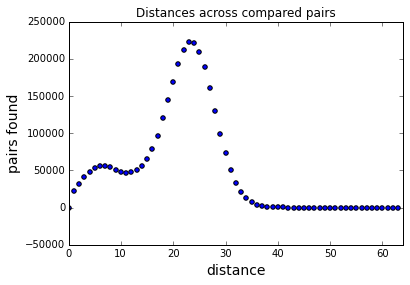

In [23]:
def read_distances_histogram(filepath):
    open(filepath, "r")
    distances_histogram = map(lambda s: map(int, s.strip().split()), open(filepath, "r"))
    distances_histogram = pd.DataFrame(distances_histogram, columns=["distance", "frequency"])
    return distances_histogram

def analyze_distances_histogram(bitsDistance):    
    distances_histogram = read_distances_histogram(stats_path + "distances_histogram_" + str(bitsDistance))
    pl.xlim(0, 64)
    pl.title("Distances across compared pairs")
    pl.xlabel("distance", fontsize=14)
    pl.ylabel("pairs found", fontsize=14)
    pl.scatter(distances_histogram["distance"], distances_histogram["frequency"])
    pl.show()
    
analyze_distances_histogram(15)

#### Важное замечание! Каждая пара учитывалась при сравнении один раз. Ясно, что пар на большом расстоянии гораздо больше. При этом пары на близком расстоянии сравнивались гораздо чаще, но я учитываю их на этом графике только один раз. По этому графику можно понять, насколько много близких пар удалось рассмотреть алгоритму, и не сравнивал ли он слишком далеких пар.

### Алгоритм поиска полудублей

Будем считать, что длина симхеша фиксированна и равна 64 бита.

Изначально, алгоритм состоял из двух фаз.

Первая фаза позволяет найти все пары документов, которые отличаются не более чем в D битах
за время $O(64^D * N \log{N})$. Это позволимо только при маленьких $D <= 2$.

Для этого достаточно перебирать набор битов, которые мы выбросим из сигнатуры, и сортировать симхеши без учета этих
битов. Тогда, документы с сигнатурами на расстоянии не более $D$ окажутся рядом в отсортированом списке и, на самом, деле уже будут лежат в списке блоками, кооторые можно называть кластерами.

При этом, после каждого набора битов, можно объединять блоки вместе и оставлять из каждого блока по одному документу,
и следующую итерацию алгоритма проводить уже над прореженной выборкой.
Из-за последней модификации возникает проблема с тем, что в один кластер могут попасть документы с совсем разными
симхешами, т.к. расстояние будет аддитивно увеличиваться с каждой итерацией.
Например, на первой итерации мы добавим кластер документов, которые отличаются не полее чем в 1 и 2 бите и заменим их на одного из представителей. На следующей итерации мы найдем документ, которых отличается от представителя в 3 и 4 бите и добавим его в тот же кластер. При этом, новый документ может отличаться от других документов в кластере в 4 битах, а это не то, чего нам хотелось.

Из-за этого свойства, я просто использовал эту фазу для поиска документов, которые отличаются в 0 битов. Таких было 7968, что уже неплохо в общем масштабе (121761).

Вторая фаза позволяет найти большую долю документов, которые отличаются на более чем в D битах за время
$O(W * D * N \log{N})$. Здесь $W$ --- это размер окна, в котором мы будем искать близкие документы. С увеличением
размера окна, точность поиска будет увеличиваться. При $W = N$ алгоритм станет точным, но за счет сортировки, гораздо меньшим размеры окна дают хорошую точность.

Алгоритм работает следующим образом: Будем делать циклические вращения симхешей. Выберем некоторое значение $S$ и сделаем вращение каждого симхеша на $S$ битов вправо. Затем отсортируем преобразованные значение симхешей, пройдемся
по отсортированному списку и будем сравнивать документы, которые находятся на расстоянии не более $W$ друг от друга в этом списке. Если расстояние между этими документами не превышает максимального допустимого, добавим их в кандадаты на кластеризацию. Повторим эту операцию для нескольких значений сдвигов. Например, для всех $S$ кратных 4. При этом, пусть размер окна $W$ будет фиксированным и равным 30.

Судя по гистограмме расстояний сравнений, близкие позиции в списке действительно имеют близкие симхеши.

После этого, необходимо найти кластеры по информации о близких документах.
Для этого я поступил следующим образом: Представил это как граф с ребрами между близкими документами и пытался
найти большие кластера в этом графе. Алгоритм поиска кластера был достаточно простым. Берем вершину с максимальной степенью и добавляем ее и всех ее соседей, которые еще не в кластерах в новый кластер. После этого уменьшаем степени соседей всех соседей этой вершины. Повторяем этот алгоритм, пока все вершины не будут покрыты кластерами.
Таким образом автоматически решается проблема выбора представителя кластера, и алгоритм можно реализовать
за время $O(E \log{V} + V \log{V})$ используя приоритетную очередь.

###Комментарии по выполнению задания:

Есть кластера, в которых странички совсем совпадают.
Это происходит по той причине, что по разным урлам можно прийти на одну и ту же страницу с другим хештегом в конце урла.
Например: http://simple.wikipedia.org/wiki/Gondor и http://simple.wikipedia.org/wiki/Middle-earth_locations#Gondor


При построении сигнатуры SimHash очень заметно влияние шума и частых слов в данных. Они могут полностью испортить
сигнатуру. Если в тексте есть много одинаковых пар символов (".\n") и они составляют >20% слов документа, то они сильно сдвигают биты сигнатуры в положительную или отрицательную сторону. За счет этого документы, в которых наблюдается такое считаются одинаковыми.

То же самое относится к частотным словам типа перечислений языков, на которых есть эта страница, текст из футеров и хидеров страницы. После их удаления качество кластеризации стало заметно лучше.

Еще одна проблема, с которой я столкнутся --- непечатные символы. Мой обработчик добавлял их к словам, и из-за этого
получалась сигнатура тоже заметно портилась. После их удаления, похожие по контенту странички стали иметь похожие симхеши.
